In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.3 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import mediapipe as mp

In [15]:
# Carregue imagens que contenham rosto(s) a até 2 metros da câmera.
from google.colab import files
upload_curta_distancia = files.upload()

# Carregue imagens que contenham rosto(s) a até 5 metros da câmera.
from google.colab import files
upload_longa_distancia = files.upload()

Saving dog or muffin.jfif to dog or muffin (1).jfif


Saving woodt.jfif to woodt (2).jfif


dog or muffin.jfif


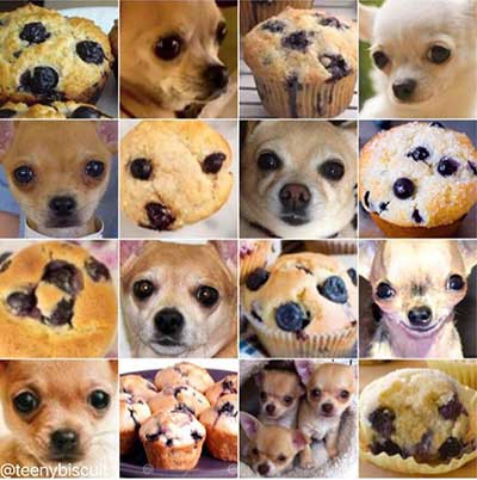

woodt.jfif


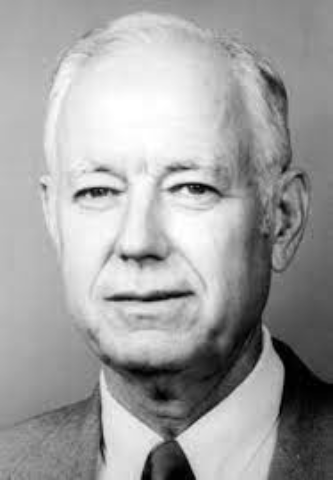

In [16]:
ALTURA_DESEJADA = 480
LARGURA_DESEJADA = 480

def redimensionar_e_mostrar(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (LARGURA_DESEJADA, math.floor(h/(w/LARGURA_DESEJADA))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/ALTURA_DESEJADA)), ALTURA_DESEJADA))
  cv2_imshow(img)

# Visualize as imagens.
imagem_curta_distancia = {name: cv2.imread(name) for name in upload_curta_distancia.keys()}
for name, image in imagem_curta_distancia.items():
  print(name)   
  redimensionar_e_mostrar(image)

imagem_longa_distancia = {name: cv2.imread(name) for name in upload_longa_distancia.keys()}
for name, image in imagem_longa_distancia.items():
  print(name)   
  redimensionar_e_mostrar(image)

In [17]:
mp_face_detection = mp.solutions.face_detection

In [18]:
# Prepare DrawingSpec para desenhar os pontos de referência da face posteriormente.

mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Deteccoes Faciais de dog or muffin.jfif:


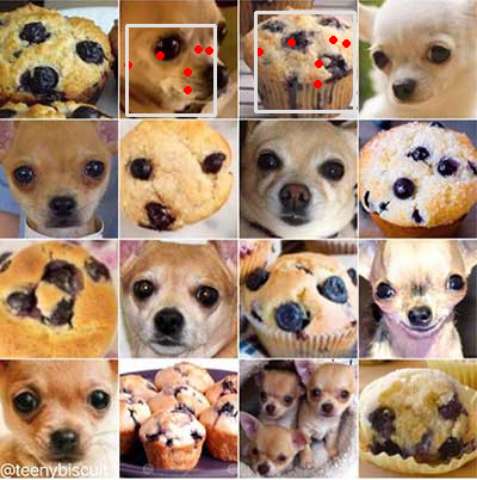

In [19]:
# Execute a detecção de rosto MediaPipe com modelo de curto alcance.

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  
  for name, image in imagem_curta_distancia.items():
    
    # Converta a imagem BGR para RGB e a processe com o MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Desenhe detecções de face de cada face.
    print(f'Deteccoes Faciais de {name}:')

    if not results.detections:
      continue

    annotated_image = image.copy()

    for detection in results.detections:

      mp_drawing.draw_detection(annotated_image, detection)
      
    redimensionar_e_mostrar(annotated_image)

Deteccoes Faciais de woodt.jfif:


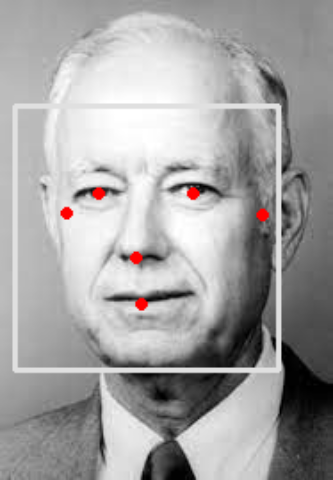

In [20]:
# Execute a detecção de rosto MediaPipe com modelo de longo alcance.

with mp_face_detection.FaceDetection(
    
    min_detection_confidence=0.5, model_selection=1) as face_detection:

  for name, image in imagem_longa_distancia.items():

    # Converta a imagem BGR para RGB e a processe com o MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Desenhe detecções de face de cada face.
    print(f'Deteccoes Faciais de {name}:')

    if not results.detections:
      continue

    annotated_image = image.copy()

    for detection in results.detections:

      mp_drawing.draw_detection(annotated_image, detection)
      
    redimensionar_e_mostrar(annotated_image)